# Day 25

In [1]:
from aocd import get_data
from inspect import cleandoc
from IPython.display import display, Markdown

def answer(x):
    display(Markdown(f"**Answer** = {x}"))

data = get_data(year=2023, day=25)

In [2]:
example = cleandoc("""
    jqt: rhn xhk nvd
    rsh: frs pzl lsr
    xhk: hfx
    cmg: qnr nvd lhk bvb
    rhn: xhk bvb hfx
    bvb: xhk hfx
    pzl: lsr hfx nvd
    qnr: nvd
    ntq: jqt hfx bvb xhk
    nvd: lhk
    lsr: lhk
    rzs: qnr cmg lsr rsh
    frs: qnr lhk lsr
""")

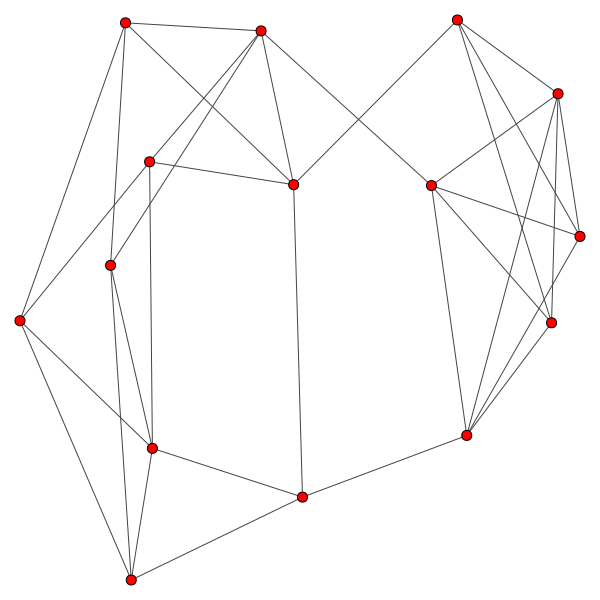

In [3]:
import igraph

def parse(text):
    def parse_line(text):
        source, targets = text.split(": ")
        targets = targets.split()
        return [(source, target) for target in targets]

    edges = [
        edge
        for line in text.split("\n")
        for edge in parse_line(line)
    ]
    vertices = {v for edge in edges for v in edge}
    result = igraph.Graph()
    result.add_vertices(list(vertices))
    result.add_edges(edges)
    return result

example_g = parse(example)
igraph.plot(example_g, vertex_size=10, edge_width=1)

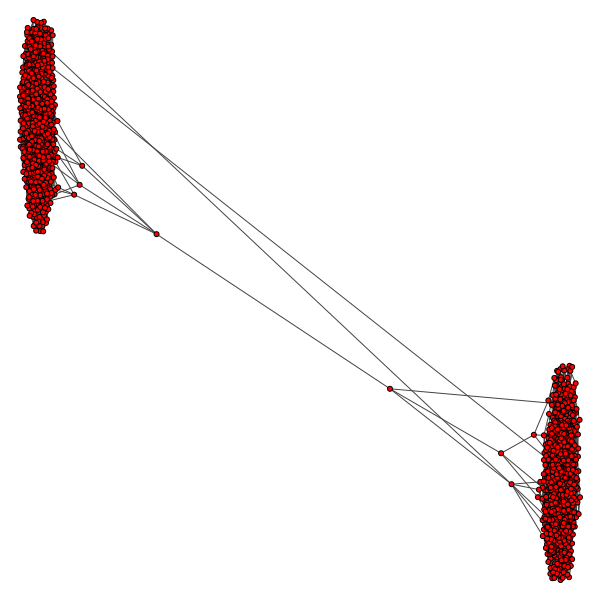

In [4]:
data_g = parse(data)

igraph.plot(data_g, vertex_size=5, edge_width=1)

In [5]:
from functools import reduce
from operator import mul

def solve(g):
    return reduce(mul, map(lambda g: len(g.vs), g.mincut().subgraphs()))

solve(example_g)

54

In [6]:
answer(solve(data_g))

**Answer** = 600225